# CY Orientifolds

This notebook provides instructions on how to read the data provided in our GitHub repository for Calabi-Yau (CY) orientifolds. 

Author: Andreas Schachner

E-Mail: andreas.schachner@gmx.net


## Packages

In [46]:
import numpy as np
import os
import sys
import glob
import pandas as pd



sn.set(rc={"figure.dpi":250, 'savefig.dpi':250})
sn.set_context('notebook')
sn.set_style("ticks")
plt.rcParams["font.family"] = "Times New Roman"
cmap=sn.color_palette("viridis", as_cmap=True)
sn.set_theme()


import pickle
import gzip
        
def load_zipped_pickle(filen):
    
    with gzip.open(filen, 'rb') as f:
        loaded_object = pickle.load(f)
        
    f.close()
        
    return loaded_object


# Read data

To read the data, we pick a value for $h^{1,1}$ and choose the type of data:

* **Complete**: Contains complete data for *all* FRSTs of *all* favourable polytopes at $2\leq h^{1,1}\leq 7$
* **Random**: Contains data obtained from random sampling at $7\leq h^{1,1}\leq 12$

Below, we work with the **Complete** data by setting **random_data=0** below.

In [33]:
h11=2

random_data=0

file="POLY_*"

home_dir=os.getcwd()

if random_data==0:
    filename = home_dir+"/Data/Complete/h11_"+str(h11)+"/"+file+".p"
else:
    filename = home_dir+"/Data/Random/h11_"+str(h11)+"/"+file+".p"
            
            
filenames =glob.glob(filename)
filenames[:5]

['/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_10_h11_2_h12_86.p',
 '/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_11_h11_2_h12_86.p',
 '/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_12_h11_2_h12_86.p',
 '/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_13_h11_2_h12_86.p',
 '/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_14_h11_2_h12_86.p']

The list **filenames** contains all filenames for polytopes with a given h11. If we want, we can further limit ourselves to polytopes with a specified h12:

In [34]:
h12=272
filenames=[file for file in filenames if "h12_"+str(h12) in file]
filenames

['/home/CY_Orientifold_database/Data/Complete/h11_2/POLY_36_h11_2_h12_272.p']

We picked $h^{1,2}=272$ which corresponds to the degree 18 hypersurface in $\mathbb{CP}[1,1,1,6,9]$ as discussed in Appendix B.1 in the paper. This leaves us with one filename which we now read in using the function **load_zipped_pickle**:

In [35]:
if len(filenames)>0:
    filename=filenames[0]
else:
    print("No filename found!")
    sys.exit()

    
ptr=load_zipped_pickle(filename)

We loaded the file into a dictionary **ptr** with the following keys:

In [36]:
ptr.keys()

dict_keys(['POLYID', 'KSID', 'h11', 'h12', 'chi', 'PPOINTS', 'WEIGHTS', 'FIBRE', 'SIMPS', 'SRI', 'INTNUMS', 'SCHERN', 'DIVS', 'DPEZ', 'OFOLDS', 'STAT'])

The keys provide access to the following data:
    
| Key | Quantity | Type | Length |
| --- | --- | --- | --- |
| **'POLYID'** | Polytope ID | scalar | 0 |
| **'KSID'** | Polytope ID | scalar | 0 |
| **'h11'** | $h^{1,1}(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'h12'** | $h^{1,2}(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'chi'** | $\chi(X_3)$ of the corresponding CY $X_3$ | scalar | 0 |
| **'PPOINTS'** | $N$ lattice points | array | h11+4 |
| **'WEIGHTS'** | GLSM weight matrix | array | h11+4 |
| **'FIBRE'** | Fiberation structre of the polytope | array | - |
| **'SIMPS'** | Simplices of all FRSTs | array | #FRSTs |
| **'SRI'** | SR-ideal for all FRSTs | array | #FRSTs |
| **'INTNUMS'** | Intersection numbers for all FRSTs | array | #FRSTs |
| **'SCHERN'** | 2nd Chern class for all FRSTs | array | #FRSTs |
| **'DIVS'** | Topological numbers of divisors for all FRSTs | array | #FRSTs |
| **'DPEZ'** | (Diagonal) del Pezzo divisors for all FRSTs | array | #FRSTs |
| **'OFOLDS'** | Orientifolds for all FRSTs | array | #FRSTs |
| **'STAT'** | Statistic for the polytope | dictionary | - |
    

The polytope ID is counted in the order of the original KS database. Non-favourable polytopes (which are currently NOT included in our database) are counted within **'KSID'**. It corresponds to **'Polytope #'** in the CY database of Altmann et al. http://www.rossealtman.com/toriccy/.

**THIS SEEMS OFF BY A FACTOR OF 1... ?!**

The triangulation dependent arrays have length of the number of triangulations.

The intersection numbers include the anti-canonical divisor at index 0.

The additional array of del Pezzo divisors does not use the information about Hodge numbers. Indeed, in some cases, a divisor might look topologically like a del Pezzo, but there are actually obstructions related to the precise embedding into the CY which can e.g. be seen on the level of intersection numbers. In the list of del Pezzo divisors, we check the necessary conditions in terms of the intersection structures stated in our paper, namely for a del Pezzo $dP_n$ divisor $D_s$:

$\int_{X_3}\, D_s^3=\kappa_{sss}=9-n>0\qquad \int_{X_3}\, D_s^2 D_i\leq 0\quad \forall i\neq s$

Furthermore, we check the diagonality condition

$\kappa_{sss}\kappa_{sij}=\kappa_{ssi}\kappa_{ssj}\quad \forall i,j$

which is usually required either for applications to the LVS or models with branes at singularities. The array of divisors $D_{s_i}$ of del Pezzo type dP$_{n_i}$ associated with the key **'DPEZ'** in structured as:

$\text{ptr["DPEZ"]}=[[s_1, n_1,d_1],[s_2, n_2,d_2],\ldots ]$

Here, $d_i=1$ means that the divisor is diagonal, and $d_i=0$ that it is non-diagonal. We give one concrete example further below.


In [37]:
Orientifolds_tr=ptr["OFOLDS"]
Divisors_tr=ptr["DIVS"]

Let us specify a triangulation **T**:

In [38]:
T=0
Orientifolds=Orientifolds_tr[T]
Divisors=Divisors_tr[T]

Let us first look at the divisor data. The topological numbers read

In [39]:
Divisors

array([[1, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [2, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [3, list([1, 0, 2, 30]), 36, 144.0, 3.0],
       [4, list([1, 0, 28, 218]), 276, 5424.0, 29.0],
       [5, list([1, 0, 65, 417]), 549, 16776.0, 66.0],
       [6, list([1, 0, 0, 1]), 3, 552.0, 1.0]], dtype=object)

There are **five** columns which encode the following quantities

| Column | Quantity | Type | Length |
| --- | --- | --- | --- |
| 1 | Divisor/coordinate index $i$ for $D_i=\lbrace z_i=0\rbrace$ | scalar | 0 |
| 2 | Hodge numbers $h^{p,q}(D_i)$ in the format $[h^{0,0},h^{0,1}, h^{0,2},h^{1,1}]$ | list | 4 |
| 3 | Euler number $\chi(D_i)$ | scalar | 0 |
| 4 | Euler number $\chi(4D_i)$ | scalar | 0 |
| 5 | Arithmetic genus $\chi_0(D_i)$ | scalar | 0 |

As an example, let us take look at the divisor $D_6$

In [40]:
D=5
D6=Divisors[D]
D6

array([6, list([1, 0, 0, 1]), 3, 552.0, 1.0], dtype=object)

This divisors has the following properties: It corresponds to a dP$_0=\mathbb{P}^2$ surface with Hodge numbers

$h^{\bullet}(D_6) =\lbrace h^{0,0},h^{0,1}, h^{0,2},h^{1,1}\rbrace= \lbrace 1,0,0,1\rbrace$

The Euler number is given by

$\chi(D_6)=3$

while the Euler number for the class $4\cdot D_6$ is

$\chi(4\cdot D_6)=552$ .

Lastly, the arithmetic genus is determined as

$\chi_0(D_6)=1$ .


We can check whether it is a proper del Pezzo surface dP$_0$ inside the CY and whether it satisfies the diagonality condition by looking at **'DPEZ'**:

In [41]:
ptr["DPEZ"][T]

array([[6, 0, 1]])

We see that $D_6$ is a proper dP$_0$ and is diagonal. The latter is of course trivial for a dP$_0=\mathbb{P}^2$, but serves here as a sanity check!

In **Orientifold** we collect the number of inequivalent orientifolds (at least concerning the weight system). The orientifold data for one such configuration is encoded in another dictionary with the following keys:

In [42]:
O=1
Orientifold=Orientifolds[O]
Orientifold.keys()

dict_keys(['OIDP', 'OIDTR', 'COORD', 'SING', 'cO3', 'oO7', 'CYEQ', 'OPC', 'OP', 'D3OP', 'D3SO8', 'D3W', 'H12PM'])

Here, the keys specify the folloing data

| Key | Quantity | Type | Length |
| --- | --- | --- | --- |
| **'OIDP'** | Orientifold ID polytope | scalar | 0 |
| **'OIDTR'** | Orientifold ID triangulation | scalar | 0 |
| **'COORD'** | Equivalent coordinates for reflection | list | - |
| **'SING'** | Singular | scalar | 0 |
| **'cO3'** | Contains coinciding O3-planes | scalar | 0 |
| **'oO7'** | Contains only O7-planes | scalar | 0 |
| **'CYEQ'** | Invariant CY equation | array | - |
| **'OPC'** | Count of fixed point loci | list | 6 |
| **'OP'** | O$p_i$-planes $[[p_1,\sharp \,\text{planes},[z_k,z_l,\ldots]],\ldots]$ for fixed point loci $z_k=z_l=\ldots=0$ | array | -- |
| **'D3OP'** | D3-charge contribution from O$p$-planes $[Q_{O3},Q_{O7},Q_{O3}+Q_{O7}]$ | list | 3 |
| **'D3SO8'** | Total D3-charge for SO(8) stacks | scalar | 0 |
| **'D3W'** | Total D3-charge for Whitney branes | scalar | 0 |
| **'H12PM'** | Hodge numbers $h^{1,2}_{\pm}$ | list | 2 |

Let us look at the example used above:

In [43]:
Orientifold["OP"]

array([[7, 1, array([1])],
       [3, 3, array([2, 3, 5])],
       [3, 1, array([2, 3, 6])]], dtype=object)

This implies that we have:

* An O7-plane on $D_1$
* An O3-plane wrapping the locus $z_2=z_3=z_6=0$
* Three O3-planes wrapping the locus $z_2=z_3=z_5=0$



# Reproducing figure 

Let us give an example of how to work with the data by reproducing figure 5 in the paper. To this end, we read the data for all divisor topologies and the corresponding D3-charge obtained from an O7-plane together with either an SO(8) stack or a fully recombined Whitney brane.

In principle, we can include all divisor topologies up to $h^{1,1}=7$. However, reading all the data for $h^{1,1}=6,7$ might take over 15 minutes.


In [60]:
h11_max=5

h11_list=[2,3,4,5,6,7]

numfiles_list=[36,243,1185,4897,16608,48821]


random_data=0

h11_X=[]
h12_X=[]
h00D_list=[]
h01D_list=[]
h02D_list=[]
h11D_list=[]
chid_list=[]
chi8d_list=[]


for I0 in range(len(h11_list)):
    
    
    
    h11=h11_list[I0]
    num_divisors=h11+4
    
    if h11>h11_max:
        break

    print("h11: ",h11)
    I4Max=numfiles_list[I0]+1
    
    
    for I4 in tqdm(range(1,I4Max)):
        
        file="POLY_"+str(I4)+"_*"
        
        filename = home_dir+"/Data/Complete/h11_"+str(h11)+"/"+file+".p"
        
        filename =glob.glob(filename)
        if len(filename)>0:
            filename=filename[0]
        else:
            print("DID NOT FIND FILE WITH ID: ",I4)
            sys.exit()
        
        ptr=load_zipped_pickle(filename)

        
        h12=ptr['h12']
        
        div_tops=np.array(ptr['DIVS'])
        len_divt=len(div_tops)
        intnums_list=ptr['INTNUMS']
        sec_chern_list=ptr['SCHERN']
        
        for I2 in range(len_divt):
            elem=div_tops[I2].T[1]
            int_nums=intnums_list[I2]
            sec_chern=sec_chern_list[I2]
            
            intnum=int_nums.T[-1]
            intnumind=int_nums.T[:3].T
            
            chid_database=div_tops[I2].T[2]
            chi4d_database=div_tops[I2].T[3]
            
            for i1 in range(num_divisors):
                el=elem[i1]
                h00D=el[0]
                h01D=el[1]
                h02D=el[2]
                h11D=el[3]
                h11_X.append(h11)
                h12_X.append(h12)
                h00D_list.append(h00D)
                h01D_list.append(h01D)
                h02D_list.append(h02D)
                h11D_list.append(h11D)
                
                divind=i1+1
                ind_dd=np.where(np.sum(np.abs(intnumind-np.array([divind,divind,divind])),axis=1)==0)[0]
                if len(ind_dd)>0:
                    trip_int_num1=intnum[ind_dd][0]
                else:
                    trip_int_num1=0
                
                chid=chid_database[i1]
                chid_list.append(chid)
                
                sec_chern_num1=sec_chern[i1]
 
                chi8d=chi4d_database[i1]+108*trip_int_num1 #Compute \chi(8*D) for the fully recombined withney brane
                
                chi8d_list.append(chi8d)
                
                
                
                
        
    
d_tot={}
d_tot["h11X"]=h11_X
d_tot["h12X"]=h12_X
d_tot["h00"]=h00D_list
d_tot["h01"]=h01D_list
d_tot["h02"]=h02D_list
d_tot["h11"]=h11D_list
d_tot["chi"]=chid_list
d_tot["chiWD7"]=chi8d_list


df=pd.DataFrame(d_tot)
df["D3SO8"]=-df["chi"]*8/24
df["D3W"]=-df["chiWD7"]*2/24

df_WD=df.copy()
print("Total length: ",len(df_WD))
df_WD=df_WD[df_WD["h02"]>1]
df_WD=df_WD[df_WD["h01"]==0]
print("Length WD7: ",len(df_WD))
df_WD=df_WD.iloc[::-1]

df_WD_nd=df_WD.copy()
df_WD_nd=df_WD_nd.drop_duplicates()



h11:  2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 202.05it/s]


h11:  3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:01<00:00, 215.34it/s]


h11:  4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1185/1185 [00:09<00:00, 130.03it/s]


h11:  5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4897/4897 [01:11<00:00, 68.93it/s]


Total length:  557029
Length WD7:  115022


## Plots for SO(8) stacks

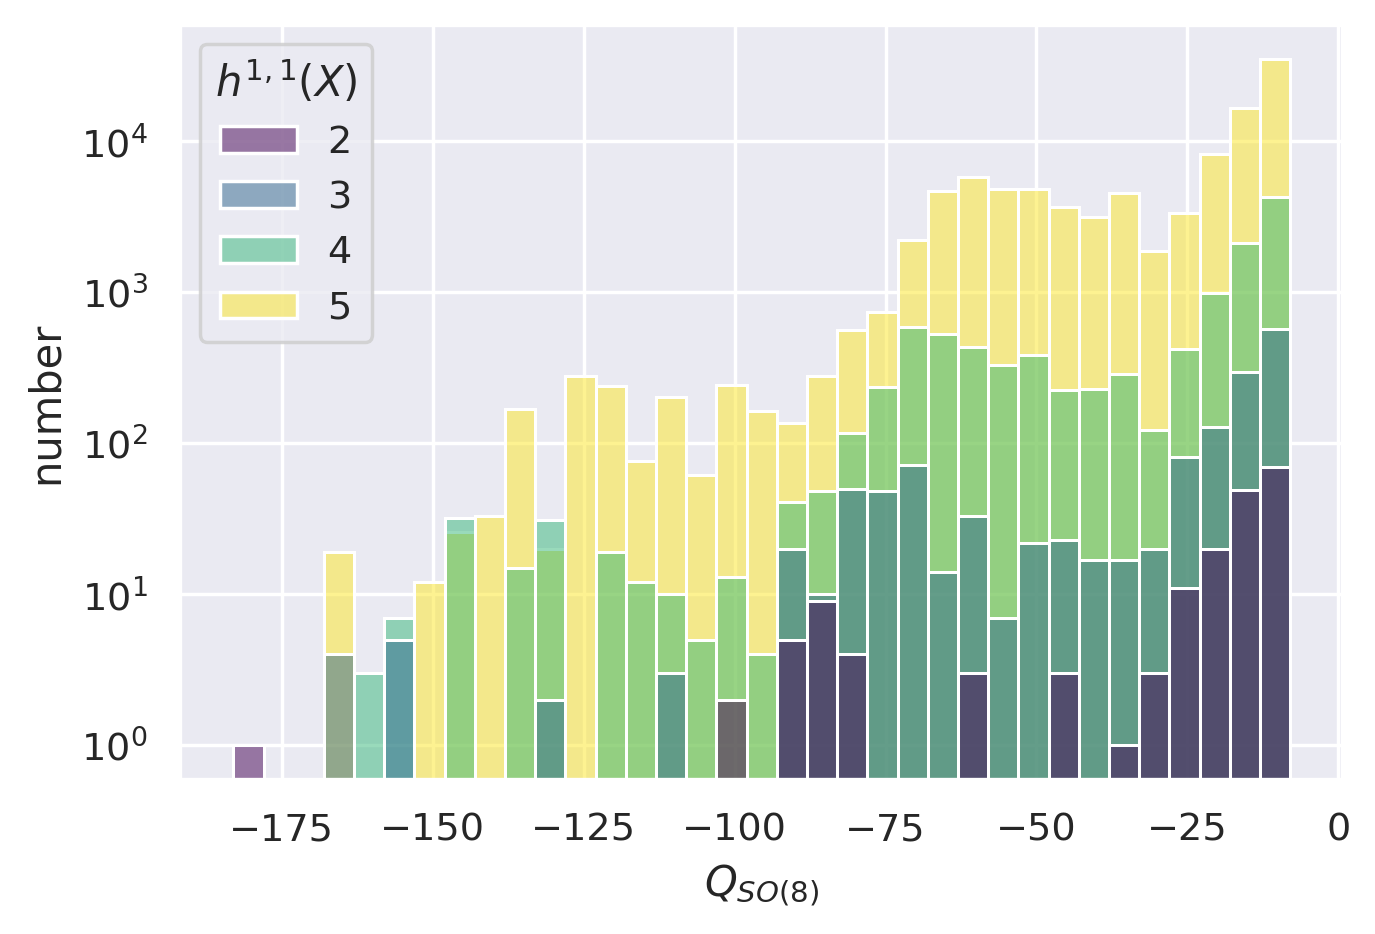

In [62]:
ax=sn.histplot(data=df_WD,x="D3SO8",hue="h11X",palette=cmap,legend=True,binwidth=5);#

ax.set(xlabel='$Q_{SO(8)}$', ylabel='number')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, np.unique(df["h11X"]), title='$h^{1,1}(X)$')

plt.yscale('log')
plt.show()

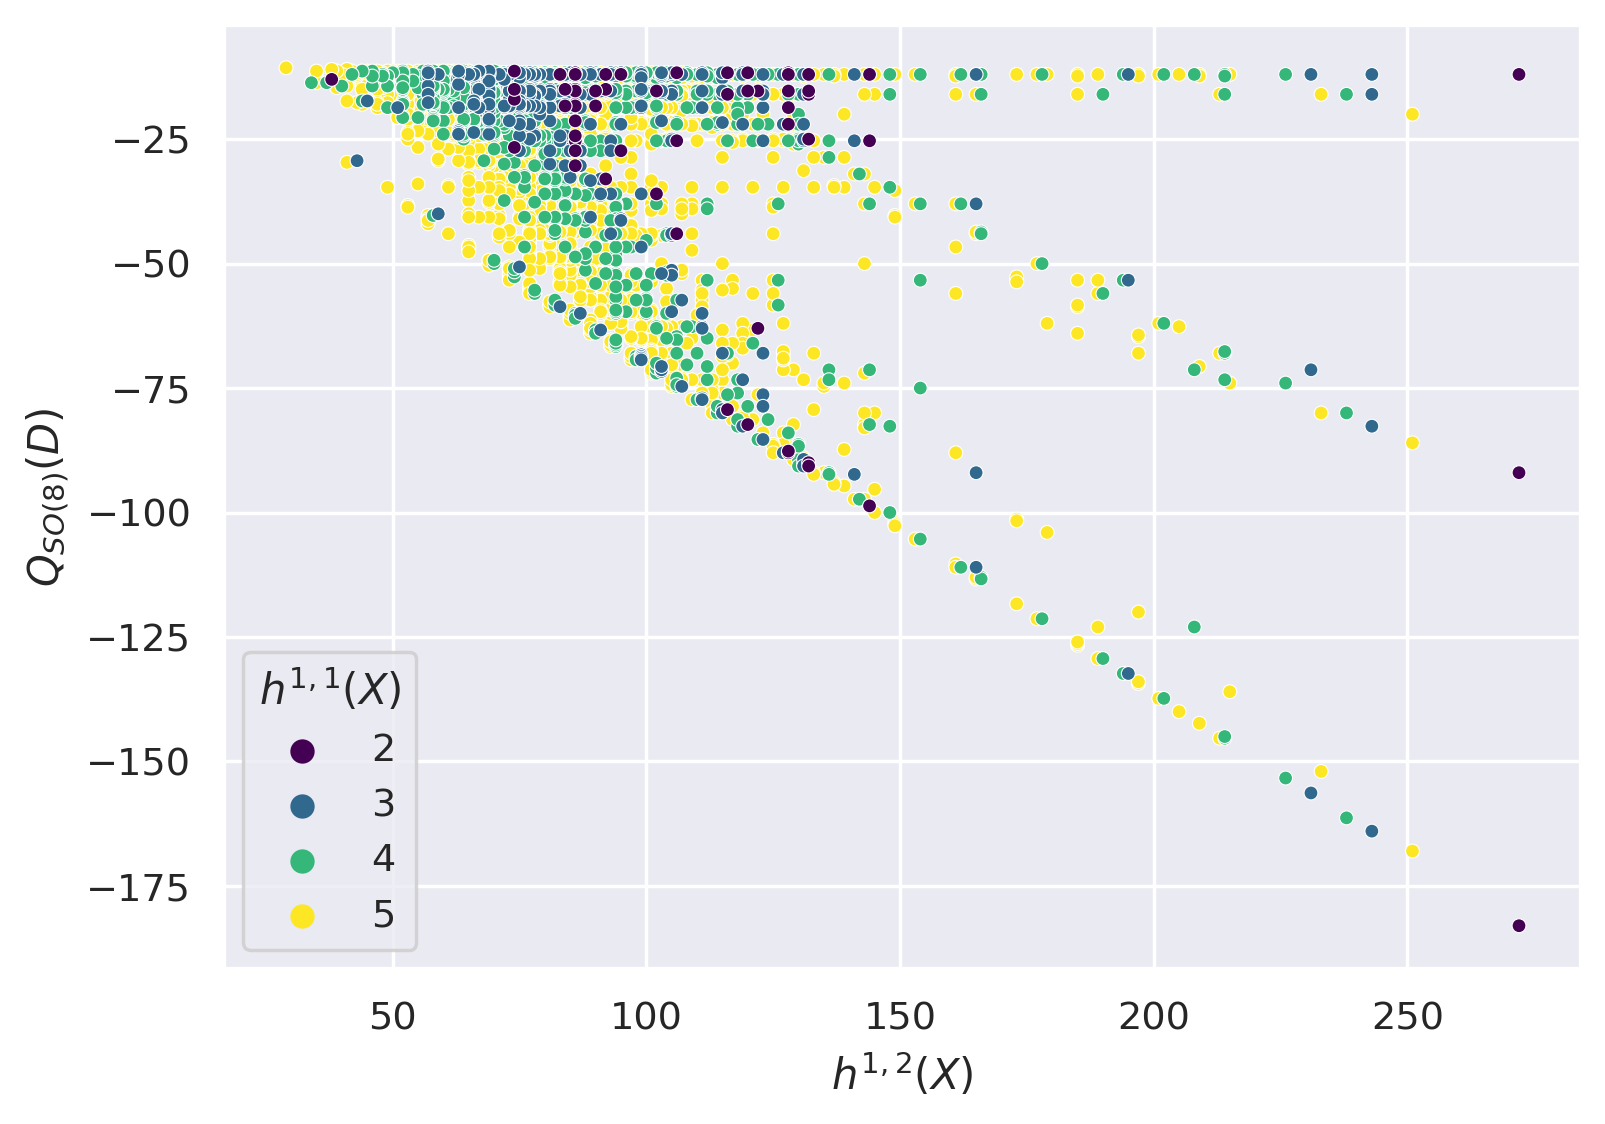

In [63]:
plt.figure(figsize=(7,5))
ax=sn.scatterplot(x="h12X",y="D3SO8",data=df_WD_nd,s=16,alpha=1.,hue=df_WD_nd["h11X"],palette=cmap);

ax.set(xlabel='$h^{1,2}(X)$', ylabel='$Q_{SO(8)}(D)$')
ax.legend( title="$h^{1,1}(X)$")
plt.show()

## Plots for fully recomined Whitney brane

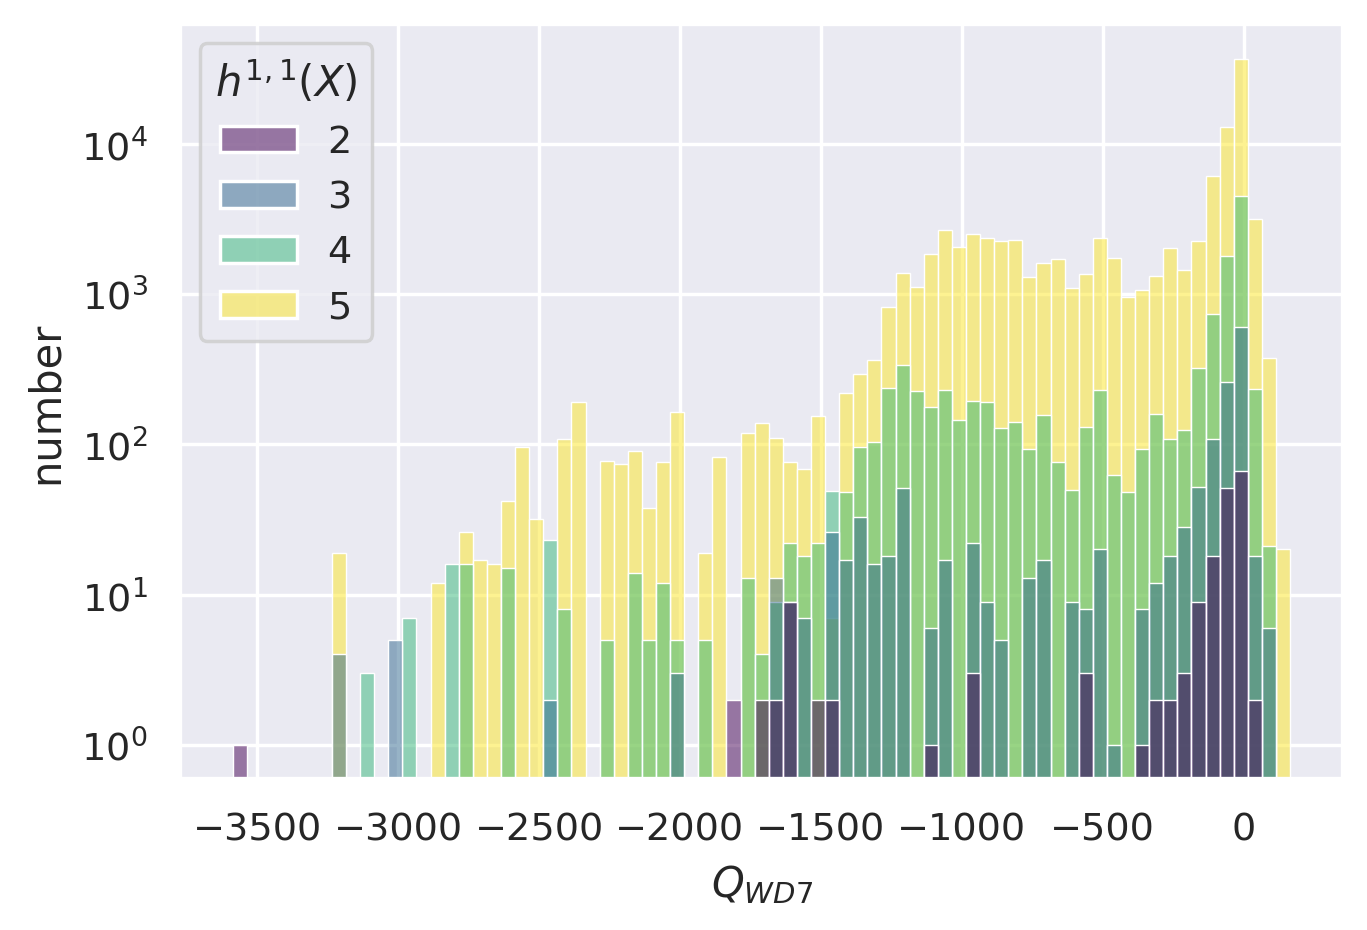

In [50]:
ax=sn.histplot(data=df_WD,x="D3W",hue="h11X",palette=cmap,legend=True,binwidth=50);#


ax.set(xlabel='$Q_{WD7}$', ylabel='number')

legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, np.unique(df["h11X"]), title='$h^{1,1}(X)$')

plt.yscale('log')
plt.show()

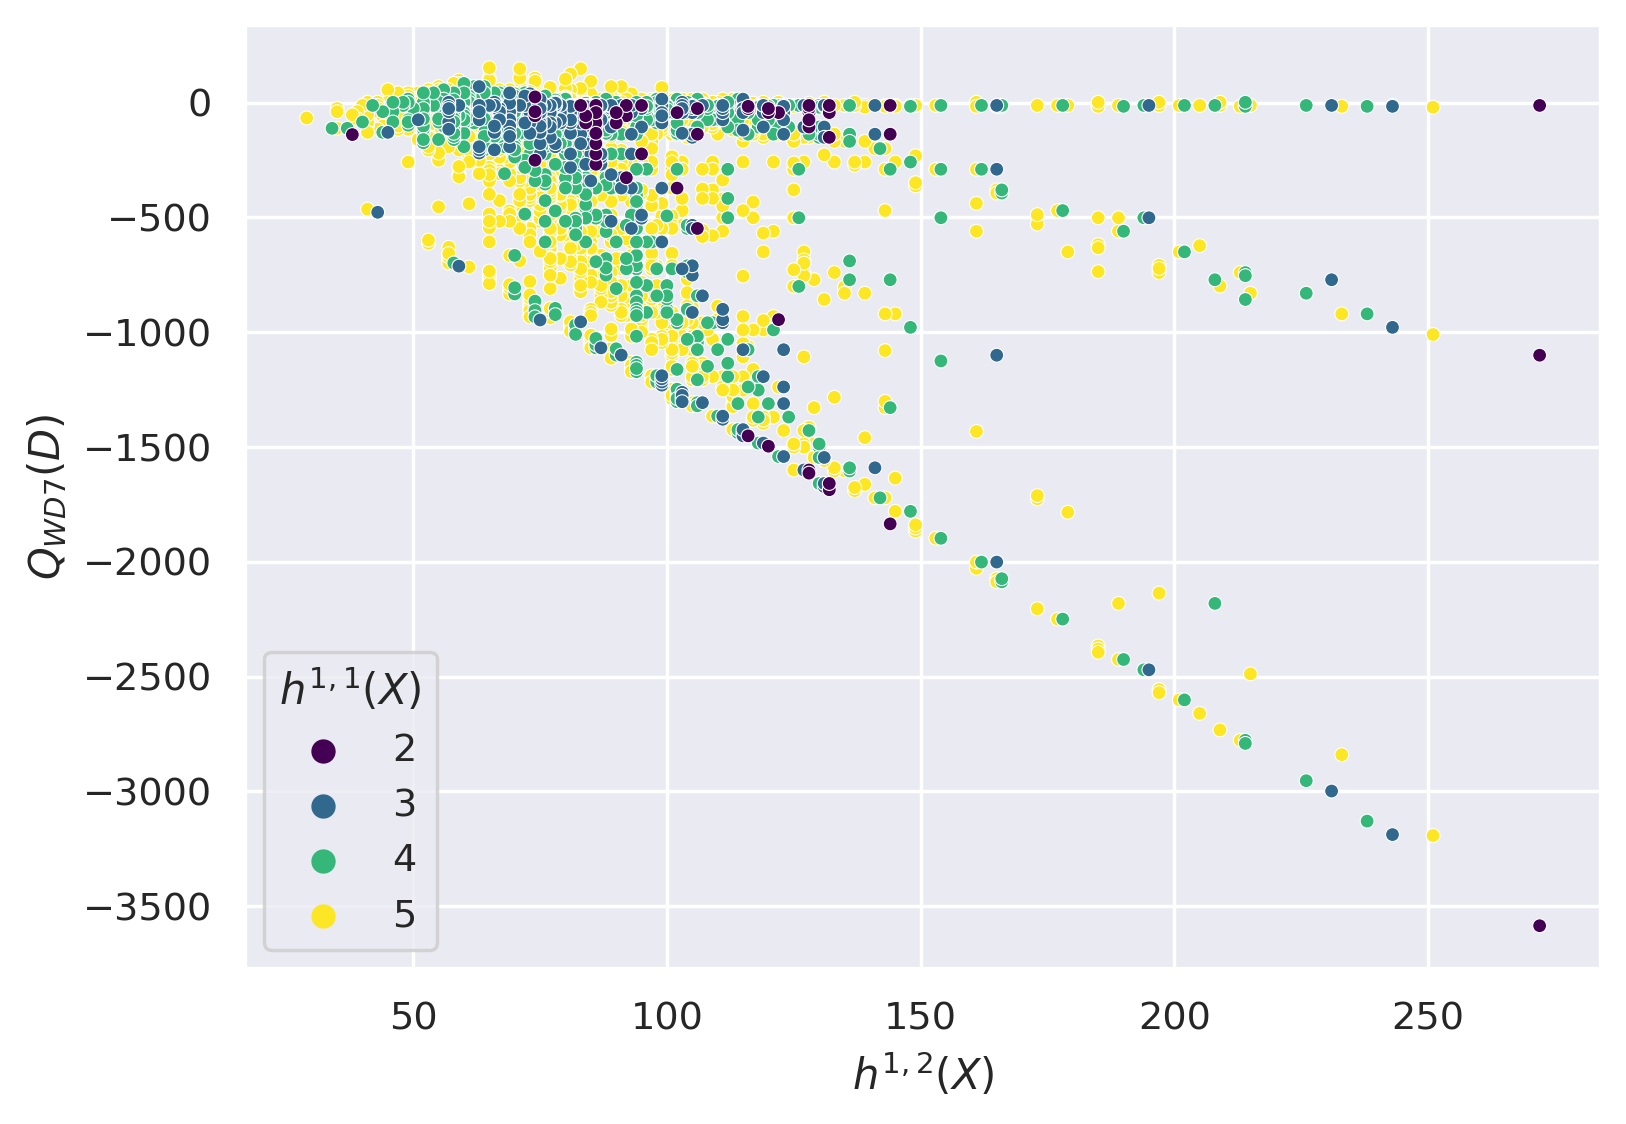

In [59]:

plt.figure(figsize=(7,5))
ax=sn.scatterplot(x="h12X",y="D3W",data=df_WD_nd,s=16,alpha=1.,hue=df_WD_nd["h11X"],palette=cmap);

ax.set(xlabel='$h^{1,2}(X)$', ylabel='$Q_{WD7}(D)$')
ax.legend( title="$h^{1,1}(X)$")
plt.show()